In [ ]:
from google.colab import files
upload=files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [ ]:
# 本次的專題目標有以下四個，我們希望你能：
# 觀察# TV shows 跟 Movies 的比例；年齡層的分類
# 觀察# 製作國別與發佈內容
# 建立內容類型的數據框的直方圖與Heatmap
# 建立文字雲分析 - 找出最多人看的影片

In [93]:
import pandas as pd
data=pd.read_csv('netflix_titles.csv')

In [94]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [95]:
movie_proportion=len(data[data['type']=='Movie'])/len(data)
TV_proportion=len(data[data['type']=='TV Show'])/len(data)

In [96]:
TV_proportion

0.3094901759342494

In [97]:
print(f'Movies佔的比例為: {movie_proportion}')
print(f'TV Show佔的比例為: {TV_proportion}')

Movies佔的比例為: 0.6905098240657506
TV Show佔的比例為: 0.3094901759342494


In [98]:
data.isnull().any() #有缺失值

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool

In [99]:
#len(data[data['director'].isnull()=='True'].index)
a=data['director'].isnull().sum()
b=data['cast'].isnull().sum()
c=data['country'].isnull().sum()
d=data['date_added'].isnull().sum()
e=data['rating'].isnull().sum()

print(f'Director遺失數量: {a}\n')
print(f'Cast遺失數量: {b}\n')
print(f'Country遺失數量: {c}\n')
print(f'Date_added遺失數量: {d}\n')
print(f'Rating遺失數量: {e}\n')

Director遺失數量: 2389

Cast遺失數量: 718

Country遺失數量: 507

Date_added遺失數量: 10

Rating遺失數量: 7



In [100]:
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [101]:
data.isnull().any

<bound method DataFrame.any of       show_id   type  title  director  ...  rating  duration  listed_in  description
0       False  False  False      True  ...   False     False      False        False
1       False  False  False     False  ...   False     False      False        False
2       False  False  False     False  ...   False     False      False        False
3       False  False  False     False  ...   False     False      False        False
4       False  False  False     False  ...   False     False      False        False
...       ...    ...    ...       ...  ...     ...       ...        ...          ...
7782    False  False  False     False  ...   False     False      False        False
7783    False  False  False     False  ...   False     False      False        False
7784    False  False  False      True  ...   False     False      False        False
7785    False  False  False      True  ...   False     False      False        False
7786    False  False  False     Fa

In [102]:
display(data['director'].value_counts())

Raúl Campos, Jan Suter           18
Marcus Raboy                     16
Jay Karas                        14
Cathy Garcia-Molina              13
Martin Scorsese                  12
                                 ..
Joe Nussbaum                      1
Byun Hyuk                         1
Michael Simon, Matthew McNeil     1
Cody Cameron, Kris Pearn          1
Chris Blake                       1
Name: director, Length: 4049, dtype: int64

In [103]:
data[data['director'].isnull().values==True]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",2017,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
24,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,"January 23, 2020",2020,TV-14,2 Seasons,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...
...,...,...,...,...,...,...,...,...,...,...,...,...
7775,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


In [104]:
# from pandas_profiling import ProfileReport
# import pandas_profiling
# report = pandas_profiling.ProfileReport(data)

In [105]:
data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [106]:
data[data['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [107]:
data[data['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [108]:
data['rating'].unique()
##結果是美國電視電影分級制度

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [109]:
print(len(data[data['rating']=='TV-14']))

1931


In [110]:
len(data[data['rating']=='TV-G'])

194

In [111]:
data.iloc[67]

show_id                                                       s68
type                                                        Movie
title           13TH: A Conversation with Oprah Winfrey & Ava ...
director                                                      NaN
cast                                  Oprah Winfrey, Ava DuVernay
country                                                       NaN
date_added                                       January 26, 2017
release_year                                                 2017
rating                                                        NaN
duration                                                   37 min
listed_in                                                  Movies
description     Oprah Winfrey sits down with director Ava DuVe...
Name: 67, dtype: object

In [112]:
#基於 Netflix shows,我們可以嘗試使用 replacements #指定id給予值
rating_replacements={
    67: 'TV-14',
    2359: 'TV-14',
    3660: 'PG-13',
    4056: 'TV-G',
    3736: 'TV-G',
    3737: 'TV-G',
    3738: 'TV-14',
    4323: 'TV-14',
}

for id,x in rating_replacements.items():
  data.iloc[id,8]=x


data.iloc[67,8]='TV-16'  #這是ok的
## rating是在第8個欄位   
data['rating'].isnull().sum()

0

In [113]:
data.iloc[67]

show_id                                                       s68
type                                                        Movie
title           13TH: A Conversation with Oprah Winfrey & Ava ...
director                                                      NaN
cast                                  Oprah Winfrey, Ava DuVernay
country                                                       NaN
date_added                                       January 26, 2017
release_year                                                 2017
rating                                                      TV-16
duration                                                   37 min
listed_in                                                  Movies
description     Oprah Winfrey sits down with director Ava DuVe...
Name: 67, dtype: object

In [114]:
display(data.isnull().sum()) #為了簡單處理, 先行丟棄director 跟 cast 欄位
print(len(data))

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

7787


In [115]:
data=data.drop(['director','cast'],axis=1) 

In [116]:
print(len(data))
print(data.columns)

7787
Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [117]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [118]:
data[data['date_added'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [119]:
data=data[data['date_added'].notna()] #因為10筆date_added數量少且不好搜尋出正確結果，所以我們把它刪除。

In [120]:
len(data)

7777

In [121]:
data.isnull().sum()

show_id           0
type              0
title             0
country         506
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [122]:
data[data['country'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
16,s17,TV Show,Feb-09,NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
38,s39,TV Show,แผนร้ายนายเจ้าเล่ห์,NaN,"March 30, 2019",2016,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q..."
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"January 26, 2017",2017,TV-16,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
97,s98,Movie,3 Deewarein,NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
117,s118,Movie,5 Cowok Jagoan,NaN,"January 5, 2019",2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...
...,...,...,...,...,...,...,...,...,...,...
7739,s7740,Movie,Your Excellency,NaN,"July 10, 2020",2019,TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin..."
7746,s7747,TV Show,دفعة القاهرة,NaN,"April 25, 2020",2019,TV-14,1 Season,"International TV Shows, TV Dramas",A group of women leaves Kuwait to attend unive...
7765,s7766,Movie,Zero Hour,NaN,"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ..."
7777,s7778,TV Show,Zombie Dumb,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


In [123]:
data['country']=data['country'].fillna(data['country'].mode()[0]) 
#由於眾數可能存在多個，所以pandas返回的是一個Series,而不像mean（）返回的是一個值。[0]默認取第一個眾數。

In [124]:
data.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

 產生新的特徵，利用日期相加取得新的年月資料

In [125]:
data['year_added'] = data['date_added'].apply(lambda x: x.split(" ")[-1])

In [126]:
data['year_added'].head()

0    2020
1    2016
2    2018
3    2017
4    2020
Name: year_added, dtype: object

In [127]:
data['month_added']=data['date_added'].apply(lambda x: x.split()[0])

In [128]:
data['month_added']

0          August
1        December
2        December
3        November
4         January
          ...    
7782      October
7783        March
7784    September
7785      October
7786        March
Name: month_added, Length: 7777, dtype: object

In [129]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults',
    'TV-16': 'Teens'

}

In [130]:
data['target_ages']=data['rating'].replace(ratings_ages)

In [131]:
data

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October,Adults
7783,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March,Teens
7784,s7785,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September,Adults
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,October,Older Kids


In [132]:
data['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [133]:
#在某些條目中，國家具有多個值。所以將在第一列中添加一個新列，以便我們檢查witch區域是否有更多作品

In [134]:
# Lets retrieve just the first country
data['principal_country']=data['country'].apply(lambda x: x.split()[0])

In [135]:
data.dtypes

show_id              object
type                 object
title                object
country              object
date_added           object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
year_added           object
month_added          object
target_ages          object
principal_country    object
dtype: object

In [136]:
# # type should be a category
# # target_ages is another category (4 classes)
# # Year added should be integer so we can compare with `released_year`

In [137]:
#type型態改為category
data['type']=pd.Categorical(data['type'])
data['target_ages']=pd.Categorical(data['target_ages'],categories=['Kids','Older Kids', 'Teens', 'Adults'])
data['year_added']=pd.to_numeric(data['year_added'])

In [138]:
data.dtypes

show_id                object
type                 category
title                  object
country                object
date_added             object
release_year            int64
rating                 object
duration               object
listed_in              object
description            object
year_added              int64
month_added            object
target_ages          category
principal_country      object
dtype: object

In [139]:
# import plotly.express as px

# fig = px.pie(data['type'].value_counts().reset_index(), values='type', names='index')
# fig.update_traces(textposition='inside', textinfo='percent+label')
# fig.show()

In [140]:
import plotly.express as px
fig=px.pie(data['type'].value_counts().reset_index(),values='type',names='index')
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

In [141]:
len(data)

7777

In [142]:
#新增rating 的資料子集
#方便做年齡層的分布查詢
def generate_rating_df(df):
    rating_df = df.groupby(['rating', 'target_ages']).agg({'show_id':'count'}).reset_index()
    rating_df=rating_df[rating_df['show_id']!=0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df
rating_df = generate_rating_df(data)
rating_df.reset_index(inplace=True)
rating_df

,index,rating,target_ages,counts
0,0,G,Kids,39
1,32,TV-G,Kids,197
2,44,TV-Y,Kids,279
3,13,PG,Older Kids,247
4,41,TV-PG,Older Kids,804
5,49,TV-Y7,Older Kids,270
6,53,TV-Y7-FV,Older Kids,6
7,18,PG-13,Teens,387
8,26,TV-14,Teens,1930
9,30,TV-16,Teens,1


In [143]:
rating_df.iloc[1]

index            32
rating         TV-G
target_ages    Kids
counts          197
Name: 1, dtype: object

In [144]:
fig=px.bar(rating_df,x='rating',y='counts',color='target_ages')
fig.show()

In [145]:
#針對影集或是歌劇
movie_df=data[data['type']=='Movie']
show_df=data[data['type']=='TV Show']

In [146]:
#新增 資料子集
#針對影集或是歌劇
from plotly.tools import make_subplots
import plotly.graph_objects as go

movie_rating_df = generate_rating_df(movie_df)
show_rating_df = generate_rating_df(show_df)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=movie_rating_df['target_ages'], values=movie_rating_df['counts']),
    row=1, col=1
)
fig.add_trace(
    go.Pie(labels=show_rating_df['target_ages'], values=show_rating_df['counts']),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Rating distribution by Type of content",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Movies', x=0.16, y=0.5, font_size=12, showarrow=False),
                 dict(text='TV Shows', x=0.82, y=0.5, font_size=12, showarrow=False)])
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [147]:
country_df = data['principal_country'].value_counts().reset_index()
country_df

,index,principal_country
0,United,3978
1,India,923
2,South,229
3,Japan,225
4,Canada,177
...,...,...
121,"Slovenia,",1
122,Namibia,1
123,"Iceland,",1
124,"Iran,",1


In [148]:
#按國別分別顯示影集與歌劇的產出分布,使用圓餅圖

country_df = country_df[country_df['principal_country'] /  country_df['principal_country'].sum() > 0.01]
display(country_df)
fig = px.pie(country_df, values='principal_country', names='index')
fig.show()

,index,principal_country
0,United,3978
1,India,923
2,South,229
3,Japan,225
4,Canada,177
5,Spain,134
6,France,115
7,Egypt,101
8,Turkey,100
9,Mexico,100


In [149]:
#按國別分別顯示影集與歌劇的產出分布,使用歷史分布
fig = px.histogram(data, x='principal_country')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [150]:
data

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults,Brazil
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,Mexico
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults,Singapore
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens,United
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens,United
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October,Adults,"Sweden,"
7783,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March,Teens,India
7784,s7785,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September,Adults,United
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,October,Older Kids,Australia



發佈內容
我們可以看到，在過去的幾年中，內容製作的數量在增加

In [151]:
released_year_df=data.loc[data['release_year']>2010].groupby(['release_year','type']).agg({'show_id':'count'}).reset_index()
#released_year_df=released_year_df.sort_values('type').sort_values('release_year')
released_year_df.columns=['release_year','type','count']
released_year_df

,release_year,type,count
0,2011,Movie,127
1,2011,TV Show,39
2,2012,Movie,158
3,2012,TV Show,60
4,2013,Movie,202
5,2013,TV Show,64
6,2014,Movie,244
7,2014,TV Show,90
8,2015,Movie,382
9,2015,TV Show,157


In [152]:
added_year_df = data.loc[data['year_added'] > 2010].groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()
added_year_df.columns=['year_added','type','count']
added_year_df

,year_added,type,count
0,2011,Movie,13
1,2011,TV Show,0
2,2012,Movie,3
3,2012,TV Show,0
4,2013,Movie,6
5,2013,TV Show,5
6,2014,Movie,19
7,2014,TV Show,6
8,2015,Movie,58
9,2015,TV Show,30


In [153]:
fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'Movie']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'Movie']['count'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='green',
))
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'TV Show']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'TV Show']['count'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='darkgreen',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'Movie']['count'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='orange',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'TV Show']['count'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='darkorange',
))
fig.update_xaxes(categoryorder='total descending')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



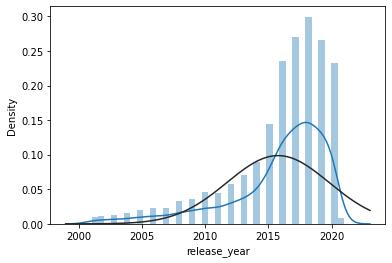

In [154]:
import seaborn as sns
from scipy.stats import norm
sns.distplot(data.loc[data['release_year'] > 2000, 'release_year'], fit=norm, kde=True)
#displot()集合了matplotlib的hist()與核函數估計kdeplot的功能，
#增加了rugplot分佈觀測條顯示與利用scipy庫fit擬合參數分佈的新穎用途。
#fit：控制擬合的參數分佈圖形，能夠直觀地評估它與觀察數據的對應關係(黑色線條為確定的分佈)

建立內容類型的數據框

In [155]:
#導入SKLEARN的前處理套件, 將元素進行二元變換 , 輸入的資料會轉換成一個 一維 classes_
#每組資料會轉換成和 classes_ 相同大小的一維陣列
#如果資料有對應到 classes_  就為 1 否則為 0

from sklearn.preprocessing import MultiLabelBinarizer

In [166]:
data['genre'] = data['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
data['genre'].head()

0    [International TV Shows, TV Dramas, TV Sci-Fi ...
1                       [Dramas, International Movies]
2                [Horror Movies, International Movies]
3    [Action & Adventure, Independent Movies, Sci-F...
4                                             [Dramas]
Name: genre, dtype: object

In [168]:
movie_df = data[data['type'] == 'Movie']
show_df = data[data['type'] == 'TV Show']

In [169]:
def calculate_mlb(series):
    mlb = MultiLabelBinarizer()
    mlb_df = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
    return mlb_df

In [170]:
calculate_mlb(data['genre']).head()

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,International TV Shows,Kids' TV,Korean TV Shows,LGBTQ Movies,Movies,Music & Musicals,Reality TV,Romantic Movies,Romantic TV Shows,Sci-Fi & Fantasy,Science & Nature TV,Spanish-Language TV Shows,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [171]:
#如何在csv文件中將一列拆分為單獨的列

def top_genres(df, title='Top ones'):
    genres_df = calculate_mlb(df['genre'])
    tdata = genres_df.sum().sort_values(ascending=False)
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=tdata.index,
        y=tdata.values,
    ))
    fig.update_xaxes(categoryorder='total descending')
    fig.update_layout(title=title)
    fig.show()

In [172]:
top_genres(movie_df, title='Top Movies Genres')

In [173]:
top_genres(show_df, title='Top TV Shows Genres')

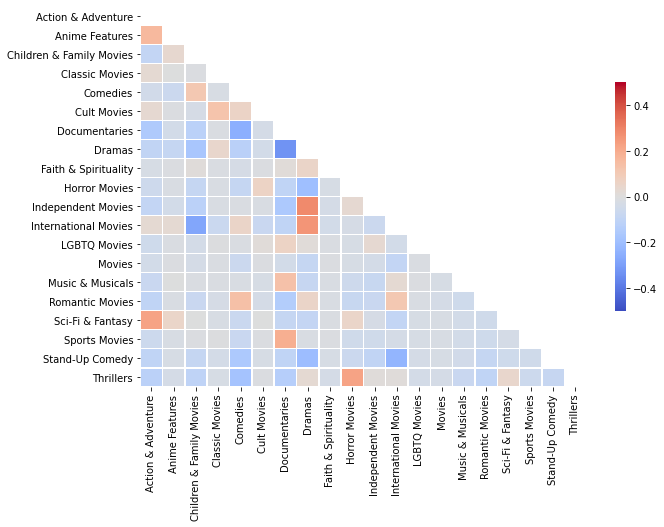

In [175]:
#如何在csv文件中將一列拆分為單獨的列
import numpy as np
genres_df = calculate_mlb(movie_df['genre'])

movie_corr = genres_df.corr()
movie_mask = np.zeros_like(movie_corr, dtype=np.bool)
movie_mask[np.triu_indices_from(movie_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(movie_corr, mask=movie_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
plt.show()

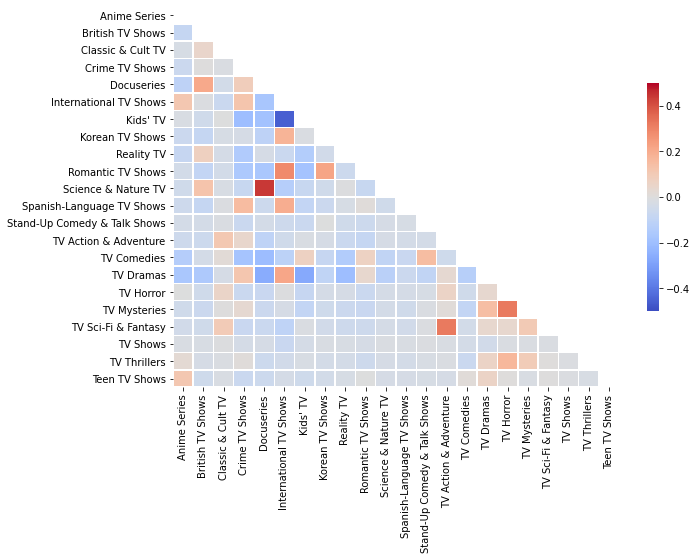

In [177]:
genres_df = calculate_mlb(show_df['genre'])

show_corr = genres_df.corr()
show_mask = np.zeros_like(show_corr, dtype=np.bool)
show_mask[np.triu_indices_from(show_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(show_corr, mask=show_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
plt.show()


In [ ]:
!pip install wordcloud

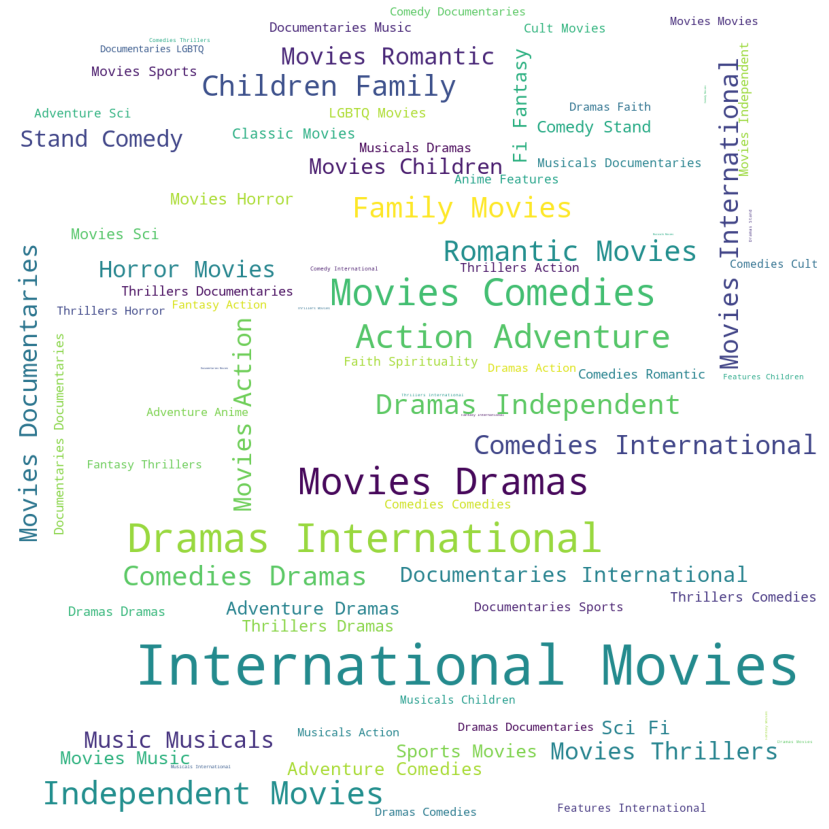

In [178]:
#使用文字雲, 找出最多被使用在資料集上的描述
#對文本數據中出現頻率較高的“關鍵詞”在視覺上的突出呈現，形成關鍵詞的渲染形成類似雲一樣的彩色圖片，從而一眼就可以領略文本數據的主要表達意思
from wordcloud import WordCloud

text = str(list(movie_df['genre'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '')

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#分析TV SHOW系列持續時間
fig = px.histogram(x=show_df['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of shows duration",
    xaxis_title="Duration of the Show",
)
fig.show()